# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?unit=Metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" +city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | dakhla
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | hailar
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | khovd
Processing Record 16 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 17 of Set 1 | al mawsil al jadidah
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | colonia
Processing Record 20 of Set 1 | stanthorpe
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

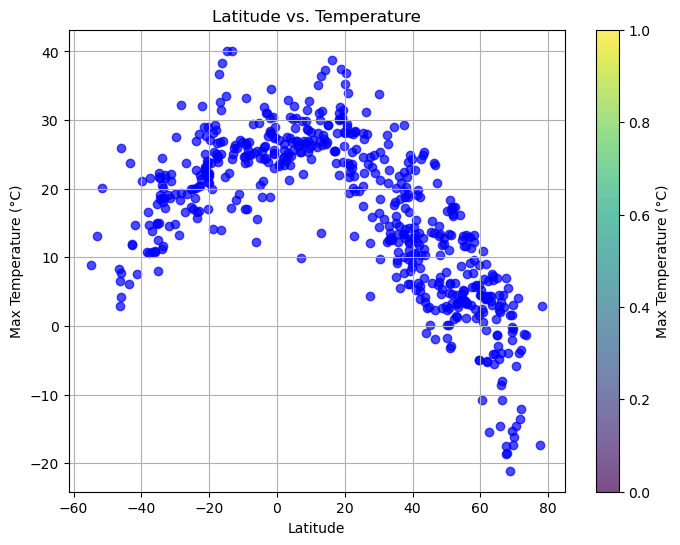

In [15]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")  
plt.title("Latitude vs. Temperature")
plt.grid(True)


# Incorporate the other graph properties
cbar = plt.colorbar()
cbar.set_label("Max Temperature (°C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

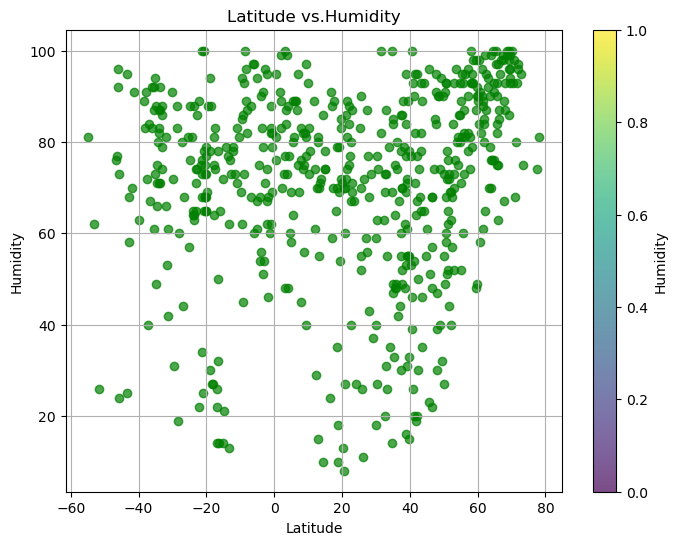

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='green', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")  
plt.title("Latitude vs.Humidity")
plt.grid(True)

# Incorporate the other graph properties
cbar = plt.colorbar()
cbar.set_label("Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

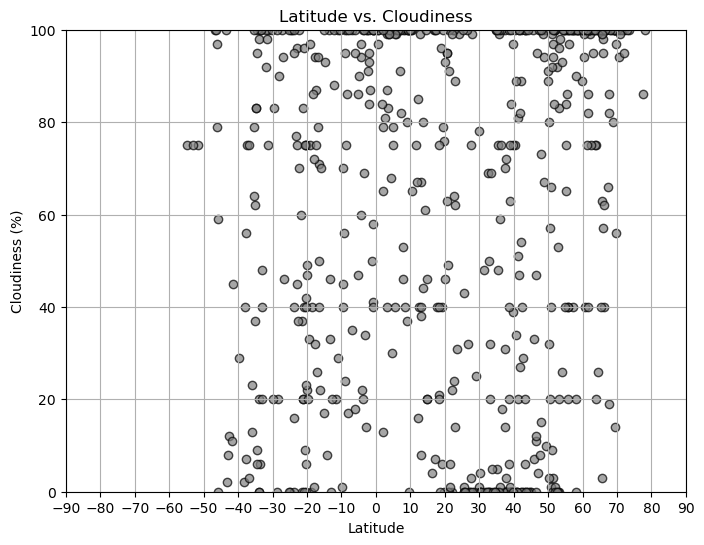

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='gray', alpha=0.7, edgecolors='black', linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)
# Incorporate the other graph properties
plt.xticks(range(-90, 91, 10)) 
plt.yticks(range(0, 101, 20))  
plt.xlim(-90, 90)  
plt.ylim(0, 100)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

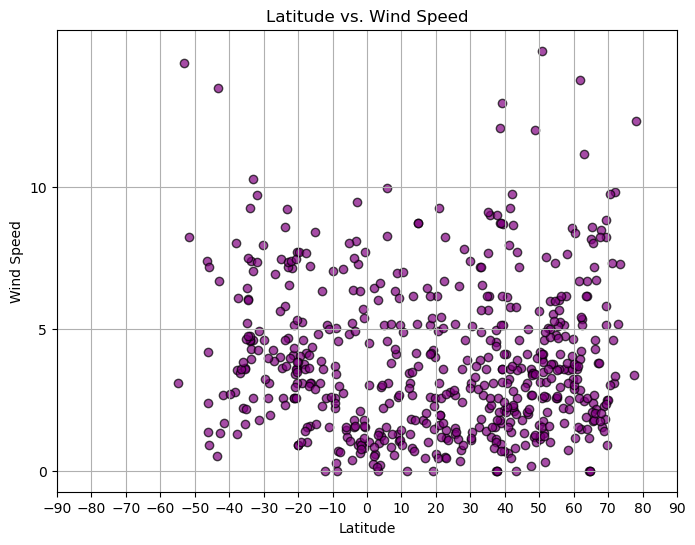

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='purple', alpha=0.7, edgecolors='black', linewidth=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)

# Incorporate the other graph properties
plt.xticks(range(-90, 91, 10))  
plt.yticks(range(0, int(city_data_df["Wind Speed"].max()) + 1, 5)) 
plt.xlim(-90, 90)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

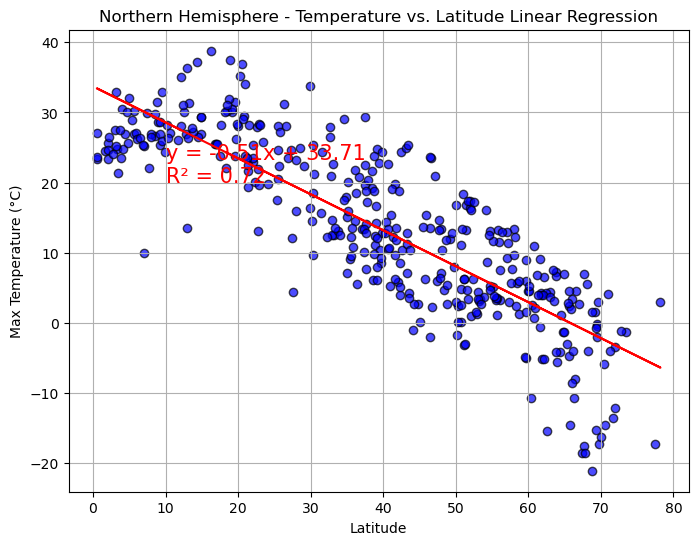

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values, regress_values, color='red')
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
plt.annotate(line_eq, (10, 20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

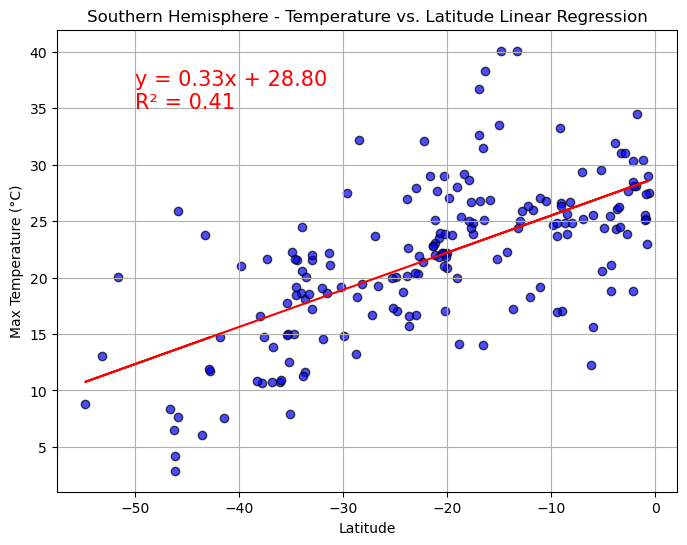

In [23]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_values_south, y_values_south)
regress_values_south = x_values_south * slope_south + intercept_south

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_south, y_values_south, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_south, regress_values_south, color='red')
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}\nR² = {r_value_south**2:.2f}"
plt.annotate(line_eq_south, (-50, 35), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

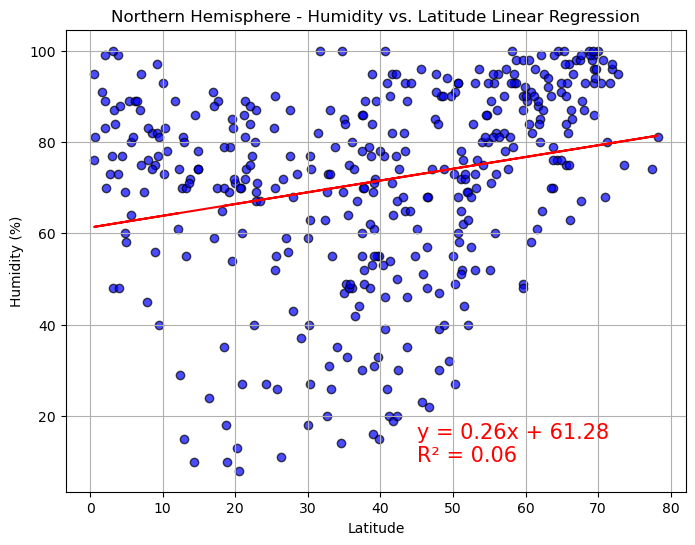

Linear Regression Equation (Northern Hemisphere - Humidity vs. Latitude): y = 0.26x + 61.28
R² = 0.06
R-squared: 0.06
P-value: 0.00


In [24]:
# Northern Hemisphere
x_values_hum_north = northern_hemi_df["Lat"]
y_values_hum_north = northern_hemi_df["Humidity"]
slope_hum_north, intercept_hum_north, r_value_hum_north, p_value_hum_north, std_err_hum_north = linregress(x_values_hum_north, y_values_hum_north)
regress_values_hum_north = x_values_hum_north * slope_hum_north + intercept_hum_north

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_hum_north, y_values_hum_north, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_hum_north, regress_values_hum_north, color='red')
line_eq_hum_north = f"y = {slope_hum_north:.2f}x + {intercept_hum_north:.2f}\nR² = {r_value_hum_north**2:.2f}"
plt.annotate(line_eq_hum_north, (45, 10), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.grid(True)
plt.show()
print(f"Linear Regression Equation (Northern Hemisphere - Humidity vs. Latitude): {line_eq_hum_north}")
print(f"R-squared: {r_value_hum_north**2:.2f}")
print(f"P-value: {p_value_hum_north:.2f}")

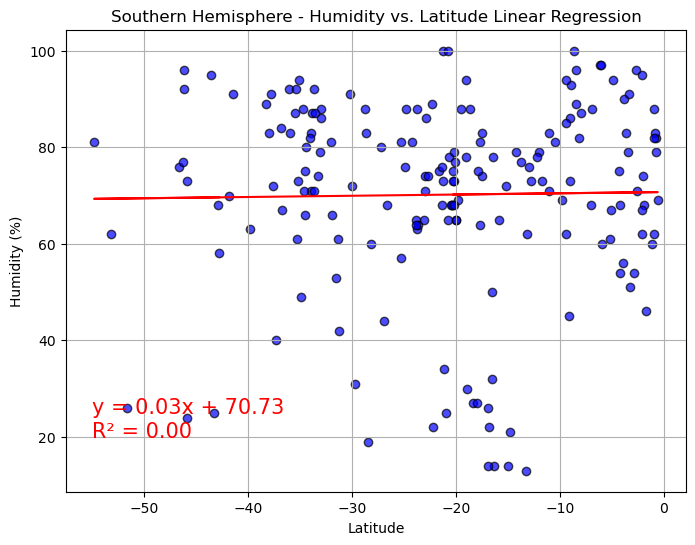

Linear Regression Equation (Southern Hemisphere - Humidity vs. Latitude): y = 0.03x + 70.73
R² = 0.00
R-squared: 0.00
P-value: 0.82


In [26]:
# Southern Hemisphere
#Extract data for humidity vs. latitude in the Southern Hemisphere
x_values_hum_south = southern_hemi_df["Lat"]
y_values_hum_south = southern_hemi_df["Humidity"]

# Perform linear regression for Southern Hemisphere
slope_hum_south, intercept_hum_south, r_value_hum_south, p_value_hum_south, std_err_hum_south = linregress(x_values_hum_south, y_values_hum_south)

# Create regression line for Southern Hemisphere
regress_values_hum_south = x_values_hum_south * slope_hum_south + intercept_hum_south

# Create the scatter plot for Southern Hemisphere
plt.figure(figsize=(8, 6))
plt.scatter(x_values_hum_south, y_values_hum_south, color='b', alpha=0.7, edgecolors='black', linewidth=1)

# Plot regression line for Southern Hemisphere
plt.plot(x_values_hum_south, regress_values_hum_south, color='red')

# Annotate the linear regression for Southern Hemisphere
line_eq_hum_south = f"y = {slope_hum_south:.2f}x + {intercept_hum_south:.2f}\nR² = {r_value_hum_south**2:.2f}"
plt.annotate(line_eq_hum_south, (-55, 20), fontsize=15, color='red')

# scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.grid(True)
plt.show()

print(f"Linear Regression Equation (Southern Hemisphere - Humidity vs. Latitude): {line_eq_hum_south}")
print(f"R-squared: {r_value_hum_south**2:.2f}")
print(f"P-value: {p_value_hum_south:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

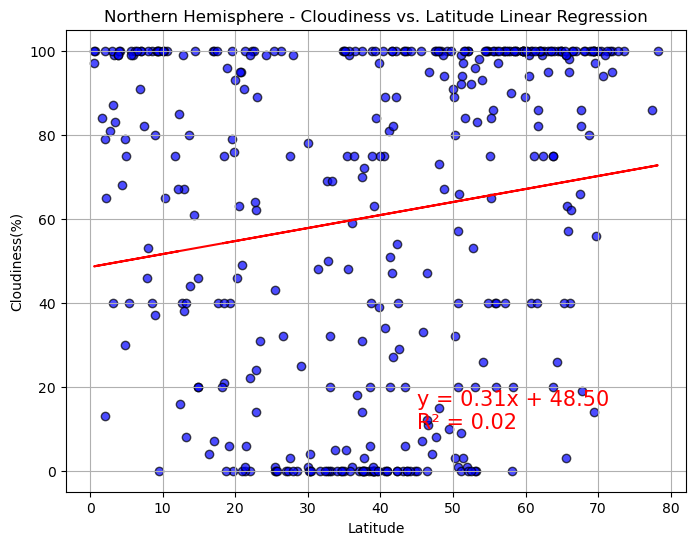

Linear Regression Equation (Northern Hemisphere -Cloudiness vs. Latitude): y = 0.31x + 48.50
R² = 0.02
R-squared: 0.02
P-value: 0.00


In [27]:
# Northern Hemisphere
x_values_hum_north = northern_hemi_df["Lat"]
y_values_hum_north = northern_hemi_df["Cloudiness"]
slope_hum_north, intercept_hum_north, r_value_hum_north, p_value_hum_north, std_err_hum_north = linregress(x_values_hum_north, y_values_hum_north)
regress_values_hum_north = x_values_hum_north * slope_hum_north + intercept_hum_north

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_hum_north, y_values_hum_north, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_hum_north, regress_values_hum_north, color='red')
line_eq_hum_north = f"y = {slope_hum_north:.2f}x + {intercept_hum_north:.2f}\nR² = {r_value_hum_north**2:.2f}"
plt.annotate(line_eq_hum_north, (45, 10), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.grid(True)
plt.show()
print(f"Linear Regression Equation (Northern Hemisphere -Cloudiness vs. Latitude): {line_eq_hum_north}")
print(f"R-squared: {r_value_hum_north**2:.2f}")
print(f"P-value: {p_value_hum_north:.2f}")

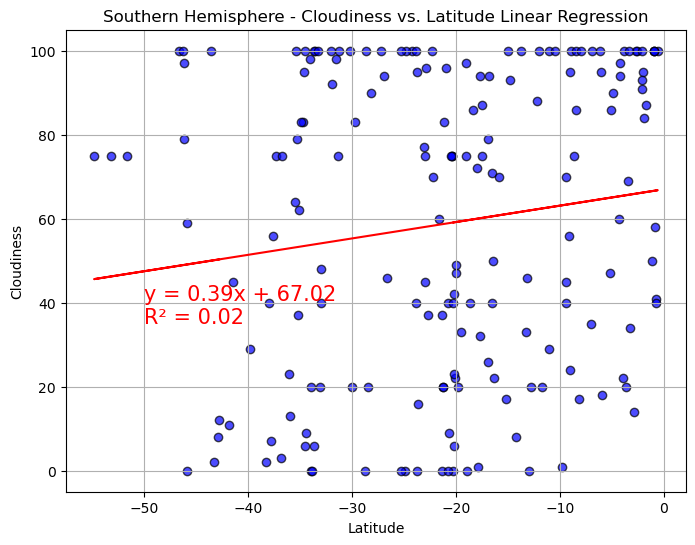

Linear Regression Equation (Southern Hemisphere - Cloudiness vs. Latitude): y = 0.03x + 70.73
R² = 0.00
R-squared: 0.00
P-value: 0.82


In [28]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Cloudiness"]
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_values_south, y_values_south)
regress_values_south = x_values_south * slope_south + intercept_south

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_south, y_values_south, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_south, regress_values_south, color='red')
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}\nR² = {r_value_south**2:.2f}"
plt.annotate(line_eq_south, (-50, 35), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.grid(True)
plt.show()
print(f"Linear Regression Equation (Southern Hemisphere - Cloudiness vs. Latitude): {line_eq_hum_south}")
print(f"R-squared: {r_value_hum_south**2:.2f}")
print(f"P-value: {p_value_hum_south:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

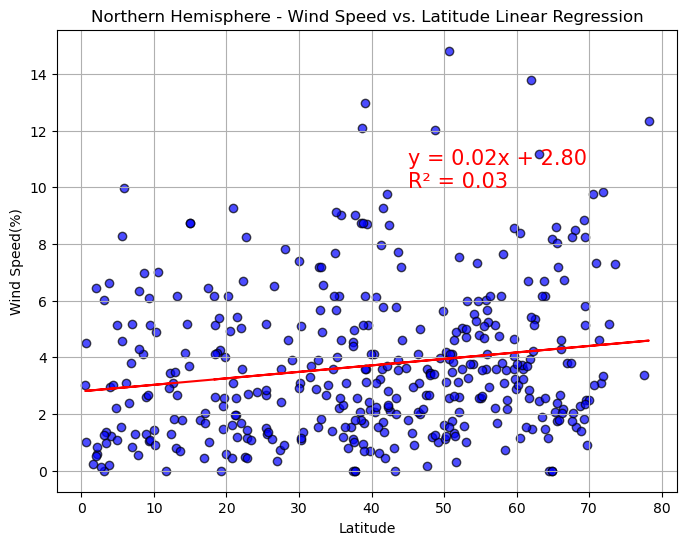

Linear Regression Equation (Northern Hemisphere -Wind Speed vs. Latitude): y = 0.02x + 2.80
R² = 0.03
R-squared: 0.03
P-value: 0.00


In [29]:
# Northern Hemisphere
x_values_hum_north = northern_hemi_df["Lat"]
y_values_hum_north = northern_hemi_df["Wind Speed"]
slope_hum_north, intercept_hum_north, r_value_hum_north, p_value_hum_north, std_err_hum_north = linregress(x_values_hum_north, y_values_hum_north)
regress_values_hum_north = x_values_hum_north * slope_hum_north + intercept_hum_north

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_hum_north, y_values_hum_north, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_hum_north, regress_values_hum_north, color='red')
line_eq_hum_north = f"y = {slope_hum_north:.2f}x + {intercept_hum_north:.2f}\nR² = {r_value_hum_north**2:.2f}"
plt.annotate(line_eq_hum_north, (45, 10), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(%)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.grid(True)
plt.show()
print(f"Linear Regression Equation (Northern Hemisphere -Wind Speed vs. Latitude): {line_eq_hum_north}")
print(f"R-squared: {r_value_hum_north**2:.2f}")
print(f"P-value: {p_value_hum_north:.2f}")

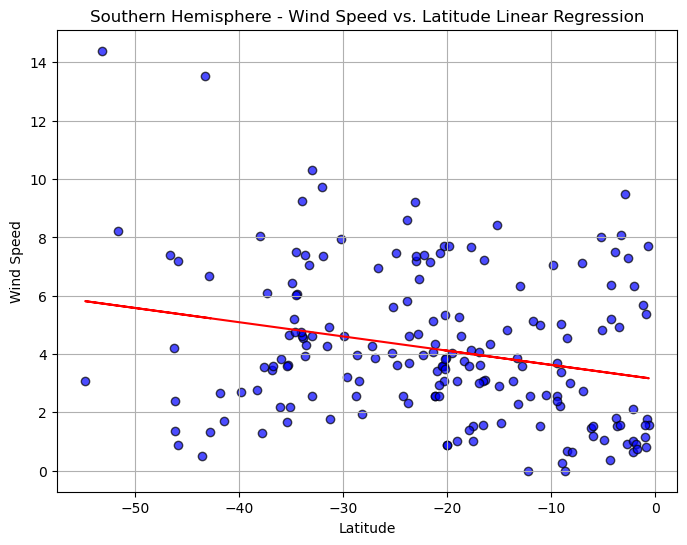

Linear Regression Equation (Southern Hemisphere - Wind Speed vs. Latitude): y = 0.03x + 70.73
R² = 0.00
R-squared: 0.00
P-value: 0.82


In [30]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Wind Speed"]
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_values_south, y_values_south)
regress_values_south = x_values_south * slope_south + intercept_south

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values_south, y_values_south, color='b', alpha=0.7, edgecolors='black', linewidth=1)
plt.plot(x_values_south, regress_values_south, color='red')
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}\nR² = {r_value_south**2:.2f}"
plt.annotate(line_eq_south, (-50, 35), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.grid(True)
plt.show()
print(f"Linear Regression Equation (Southern Hemisphere - Wind Speed vs. Latitude): {line_eq_hum_south}")
print(f"R-squared: {r_value_hum_south**2:.2f}")
print(f"P-value: {p_value_hum_south:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE